<a href="https://colab.research.google.com/github/aadhithyan01/TSF-GRIP-TASK1/blob/main/TSF_GRIP_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# The Sparks Foundation: Graduate Rotational Internship Program - Data Science & Business Analytics Intern 

## Prediction Using Supervised learning
 
**Dataset : http://bit.ly/w-data**

Done By: Aadhithyan R

---



Simple Linear Regression (Prediction Using Supervised learning)
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [108]:
# Importing required libararies in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

# **Reading the data**

In [109]:
# Reading data from url
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10) # displaying 10 rows

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Visualising Data using pyplot**

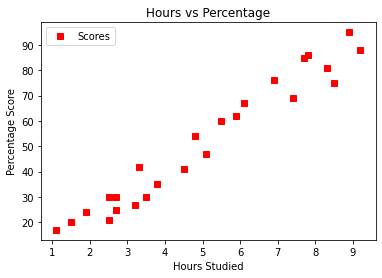

In [110]:
y_data = df['Scores']
x_data = df['Hours']
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='s', color= "r")  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Clearly there is a regression line from the graph above between the number of hours studied and percentage of score. Lets plot a regression line to confirm the correlation.

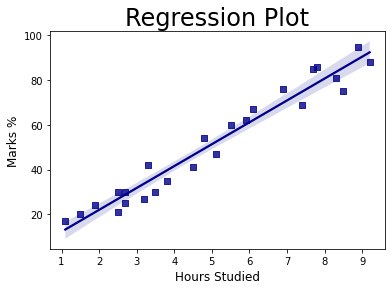

In [111]:
import seaborn as sns #for importing regplot
sns.regplot(y=y_data, x=x_data, color = "darkblue", marker="s") # for plotting regresion line
plt.title('Regression Plot',size=24)
plt.ylabel('Marks %', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Now, we can clearly see that there is a ***positive linear relation*** between the number of hours studied and percentage of score.


## **Correlation between the columns**

In [112]:
df.corr() # to find the pairwise correlation of all columns in the dataframe

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **Preparing the data**

The next step is to divide the data into "attributes" (inputs, i.e df_X) and "labels" (outputs, i.e df_Y). 

In [113]:
# Defining X and Y from the df
df_X = df.iloc[:, :-1].values  
df_Y = df.iloc[:, 1].values

## **Splitting dataset into training and testing set using train_test_split**

In [114]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, 
                            test_size=0.3, random_state=42) 

Training the algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm(using linear regrssion)

In [115]:
from sklearn.linear_model import LinearRegression  
Reg= LinearRegression()  
Reg.fit(X_train, Y_train) 

print("Model Trained Sucessfully")

Model Trained Sucessfully


# **Predicting the Percentage of Marks**

In [116]:
pred_Y = Reg.predict(X_test)
pred_Y

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

# **Comparing Actual and Predicted data**

In [117]:
# Comparing Actual vs Predicted
compare = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_Y})  
compare

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


# Visualizing Actual and Predicted data using **BAR CHART**

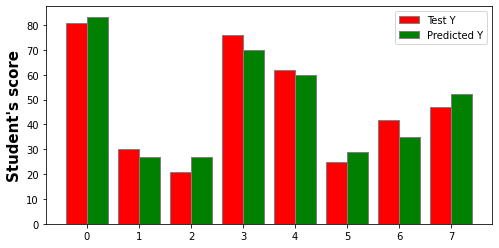

In [118]:
# set width of bar
barWidth = 0.4
fig = plt.subplots(figsize =(8, 4))
 
 
# Set position of bar on X axis
br1 = np.arange(len(compare.Predicted))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, Y_test, color ='r', width = barWidth,
        edgecolor ='grey', label ='Test Y')
plt.bar(br2, pred_Y, color ='g', width = barWidth,
        edgecolor ='grey', label ='Predicted Y')
 
# Adding Xticks
plt.ylabel("Student's score", fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(Y_test))],
        ['0', '1', '2', '3', '4','5','6','7'])
 
plt.legend()
plt.show()

# **Evaluating Model**

In [119]:
from sklearn.metrics import mean_absolute_error
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(Y_test,pred_Y))

Mean absolute error:  4.499999999999998


Mean absolute error: **4.499999999999998** Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

*What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?*

In [120]:
hours = [9.25]
answer = Reg.predict([hours])
print(f"Score = {answer[0]}")
answer[0]

Score = 92.61670033840096


92.61670033840096

Score = *92.61670033840096* According to the regression model if a student studies for 9.25 hours a day he/she is likely to score *92.61670033840096* marks.